## PHYS-253 

## Homework 3

Handed out: Friday, April 11, 2025

**Due: 4.59 pm; Monday, May 5, 2025**

## Instructions

a) You are allowed to discuss with your fellow students HOW to solve the problems. Collaboration is encouraged! But you need to hand in your INDIVIDUAL SOLUTION.  

d) List AI assistants (e.g., ChatGPT) that you worked with in arriving at a solution, or other software/tool; see detailed instructions in next cell. 

c) You can use code from previous lectures/labs - you don't neeed to reference this, it is part of the knowledge you acquired in this course.  However, if you use code from other sources, you MUST include a reference to the source.

d) Submit your Notebook (with solutions/answers) to Phys-253 site (area: ΕΡΓΑΣΙΕΣ / HW3).

### On the use of AI assistants (e.g., ChatGPT, or other Generative A.I. tools)

ChatGPT can be used as an on-line “office hours” resource to help with your learning. 
You can use ChatGPT-generated code (e.g. as inspiration if you are stuck or other reasons), however, submission of ChatGPT-generated
code without explanation or acknowledgment will earn you 0 credit. See cell below.

__________________________________________________________________________________________________________________________

### Problem: Predict financial stock prices 

In this problem, you will choose a financial stock (of your preference) to make 

a) a next-day prediction; 

b) a seven-day prediction;

based on the RNN models presented in Lab.

You may construct as many NNs as you wish to improve performance, but you must do all models presented in the lecture's notebook (e.g., SimpleRNN, Deep RNNs, LSTM, GRU, bidirectional [you may want to see more on these in the A. Geron's book])

In a companion Notebook you can get guidance/instructions to download daily stock price data from YahooFinancials, and in a companion PDF file you will learn why it is important to work with daily *returns* instead of daily *prices*. 

Show all your work and compare your predictions to the next-day (seven-days) actual data.

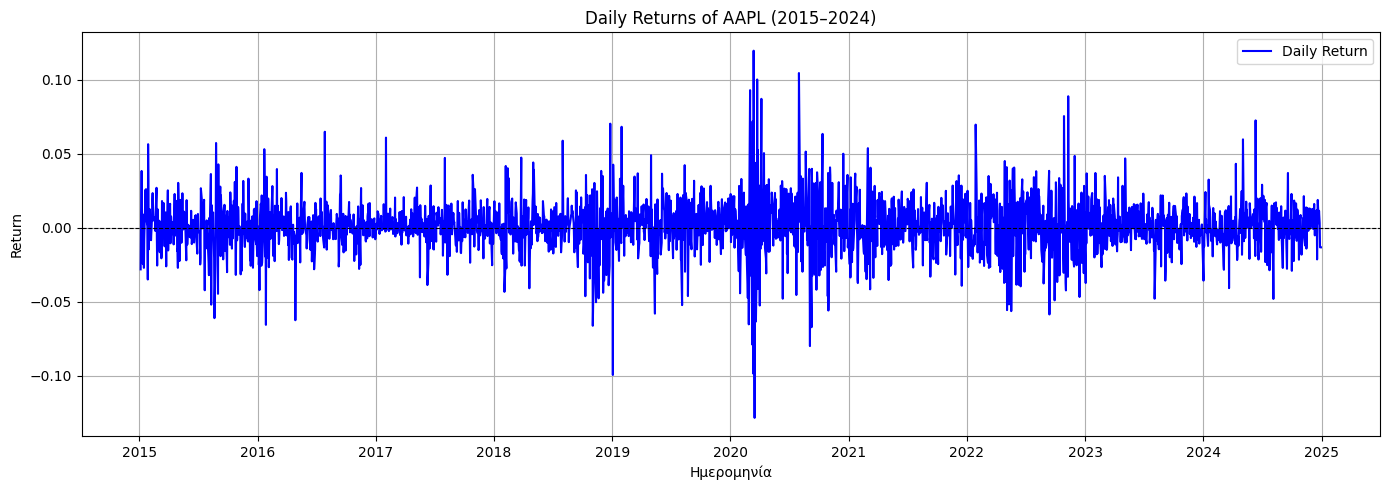

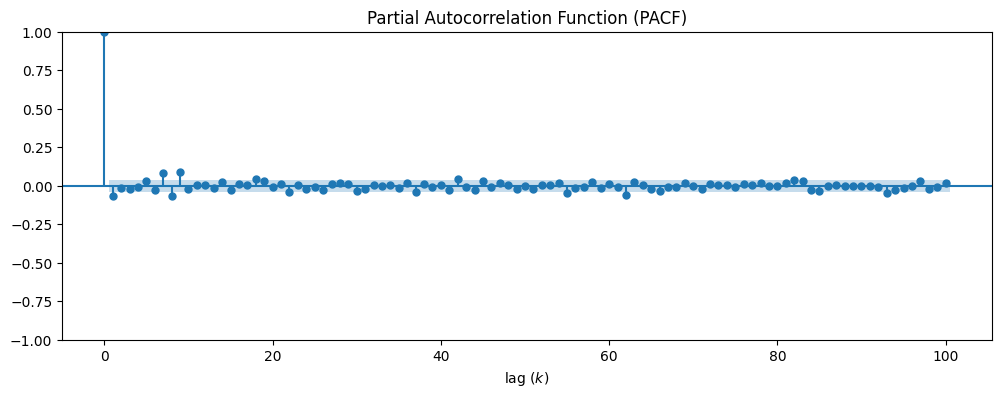

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step
MSE Values for each model (1-day prediction):
SimpleRNN: 0.00021757316700136024
DeepRNN: 0.00031409993843341217
LSTM: 0.00021062310697675865
GRU: 0.0001860559313714963
Bidirectional LSTM: 0.0002721423160173358
Bidirectional GRU: 0.00019549379067893496
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step
MSE Values for each model (7-day prediction):
SimpleRNN: 0.0002147537727791207
DeepRNN: 0.000276498568512975
LSTM: 0.0001929479531800646
GRU: 0.00019841429349365722
Bidirectional LSTM: 0.0002019585202166657
Bidirectional GRU: 0.0001895660951623744


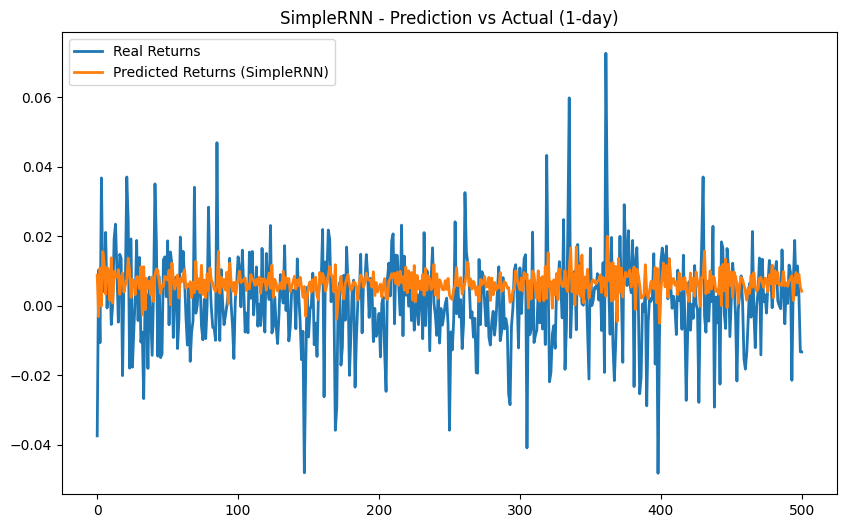

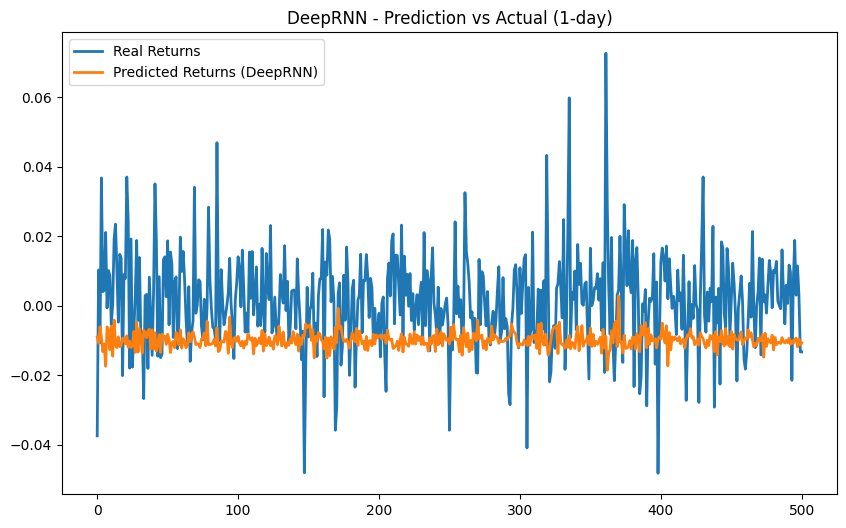

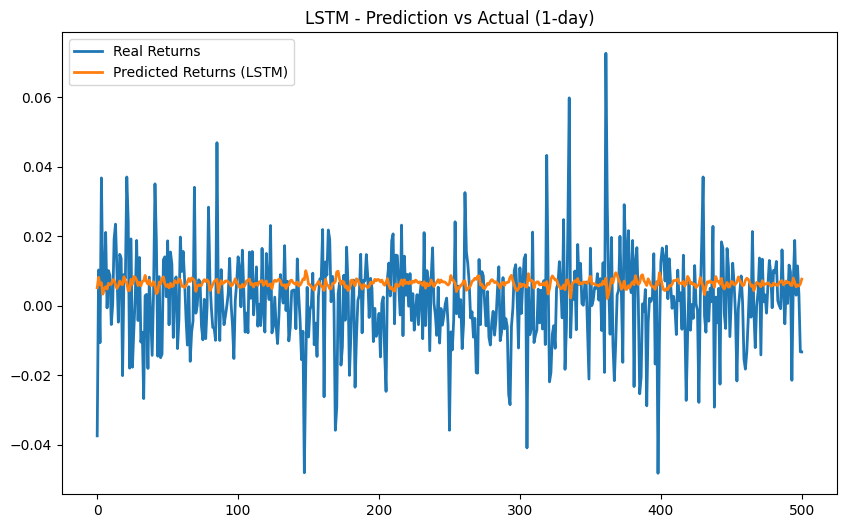

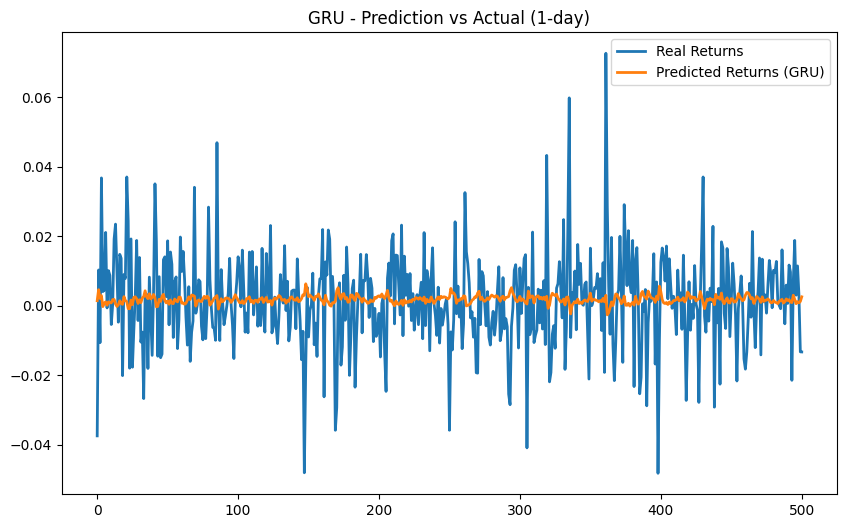

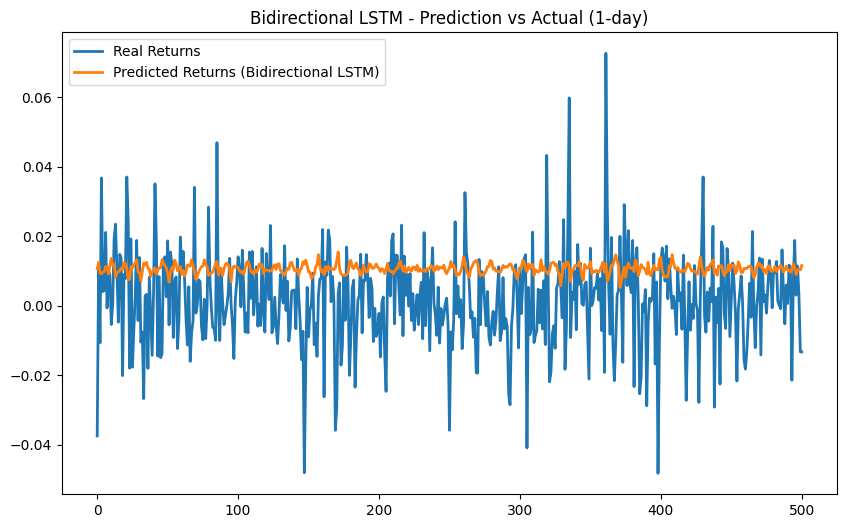

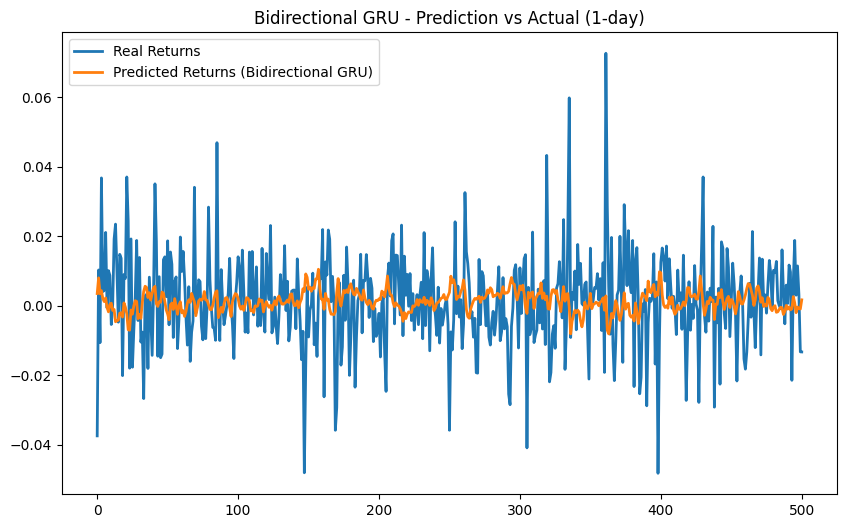

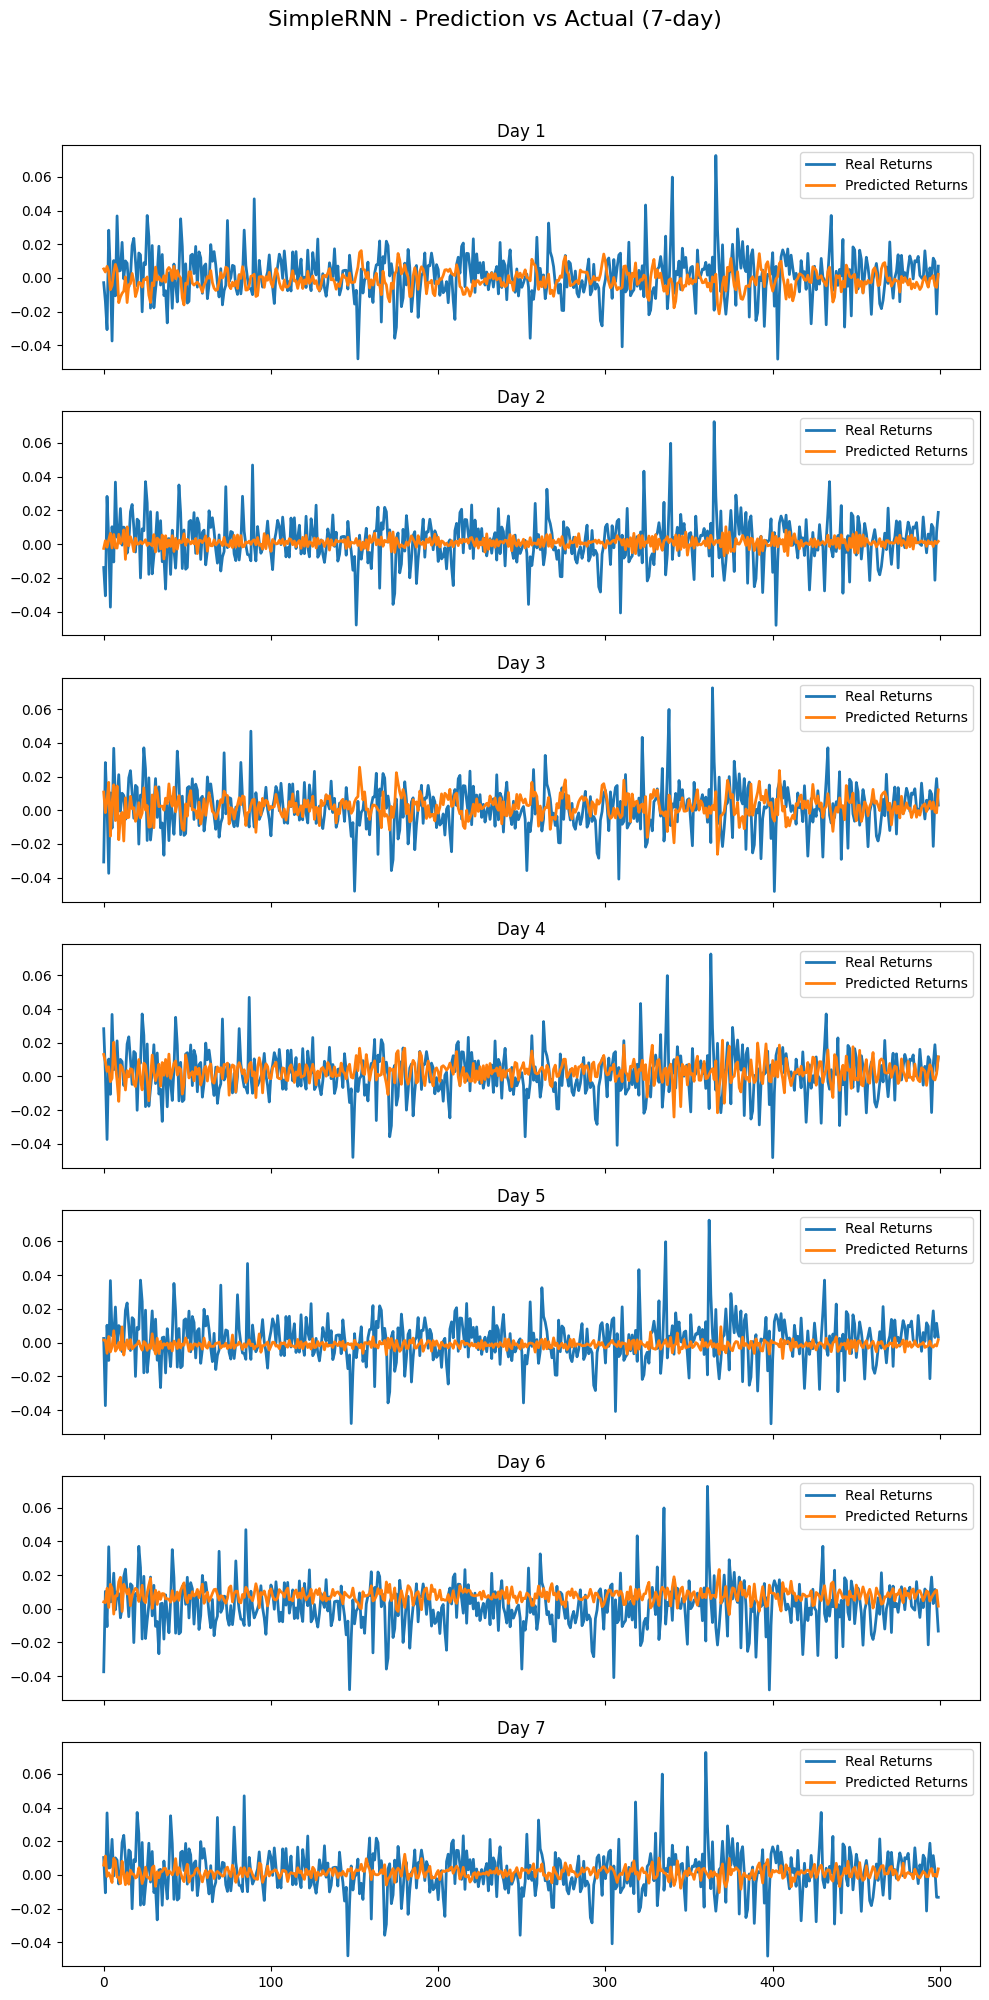

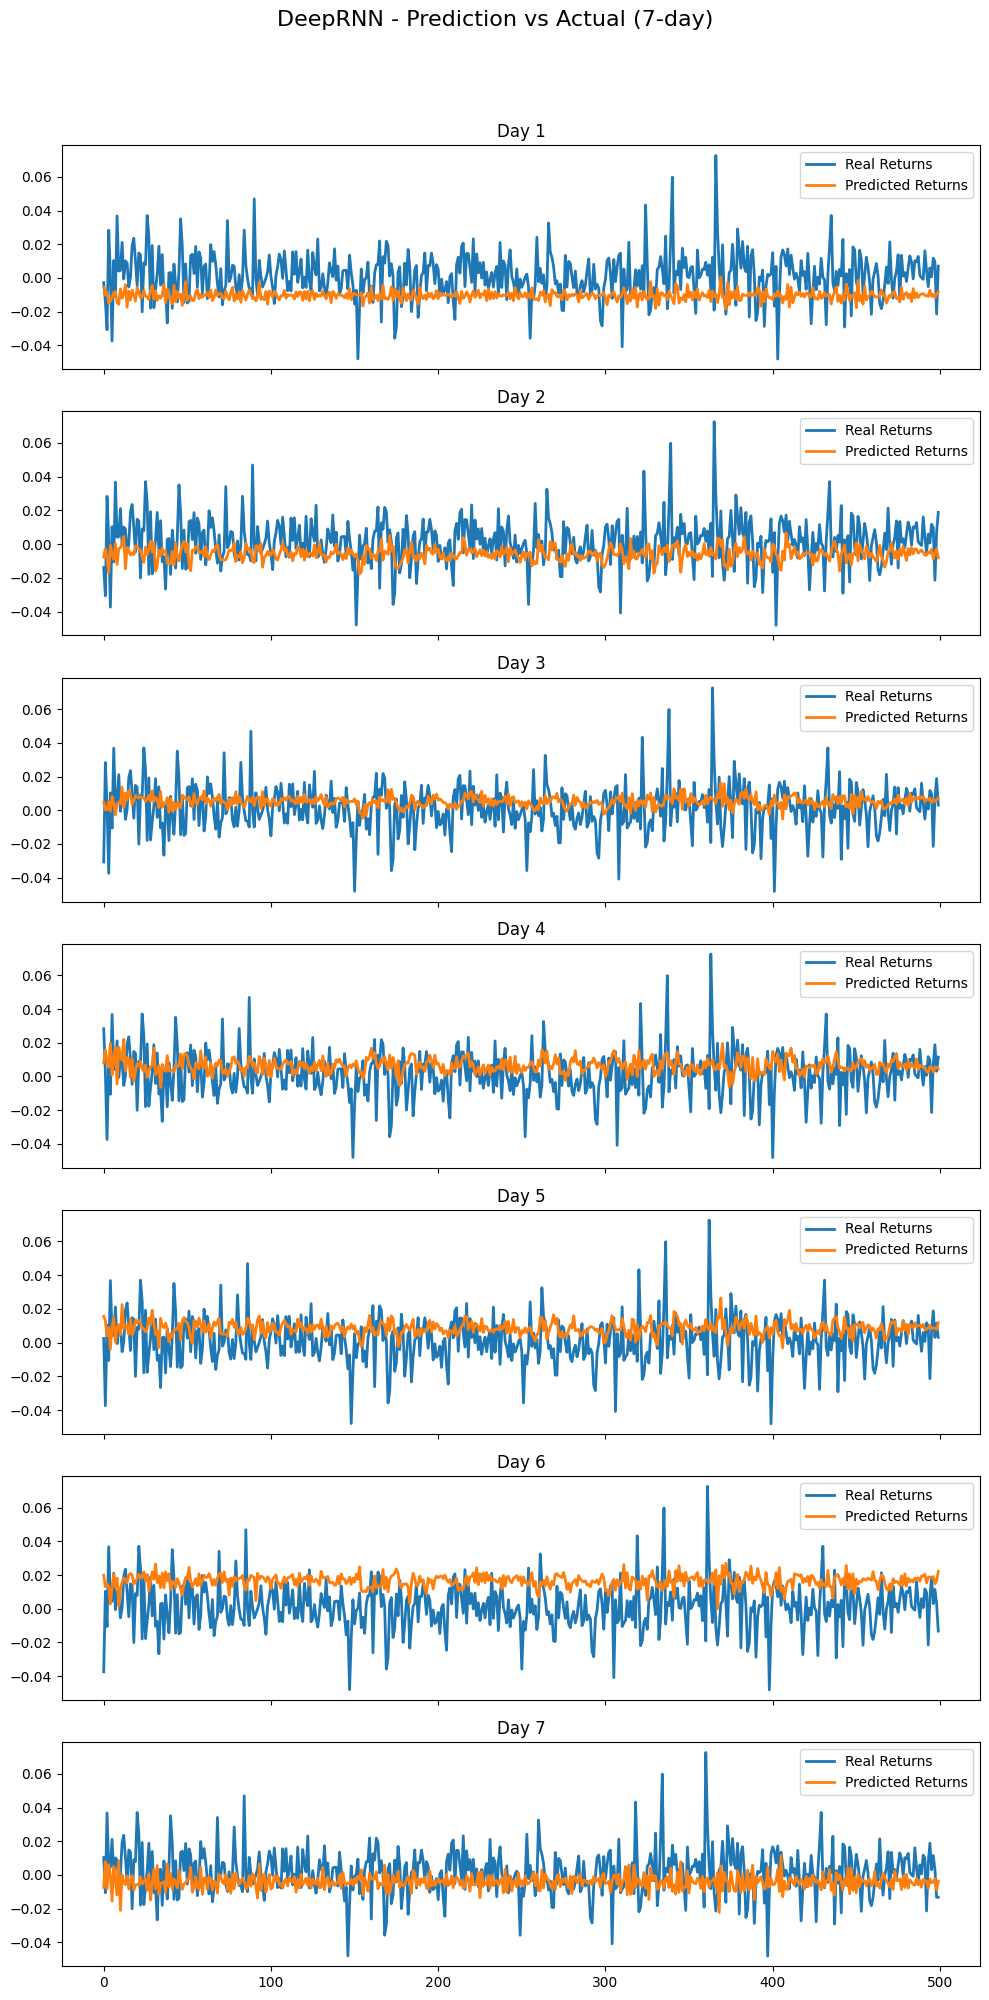

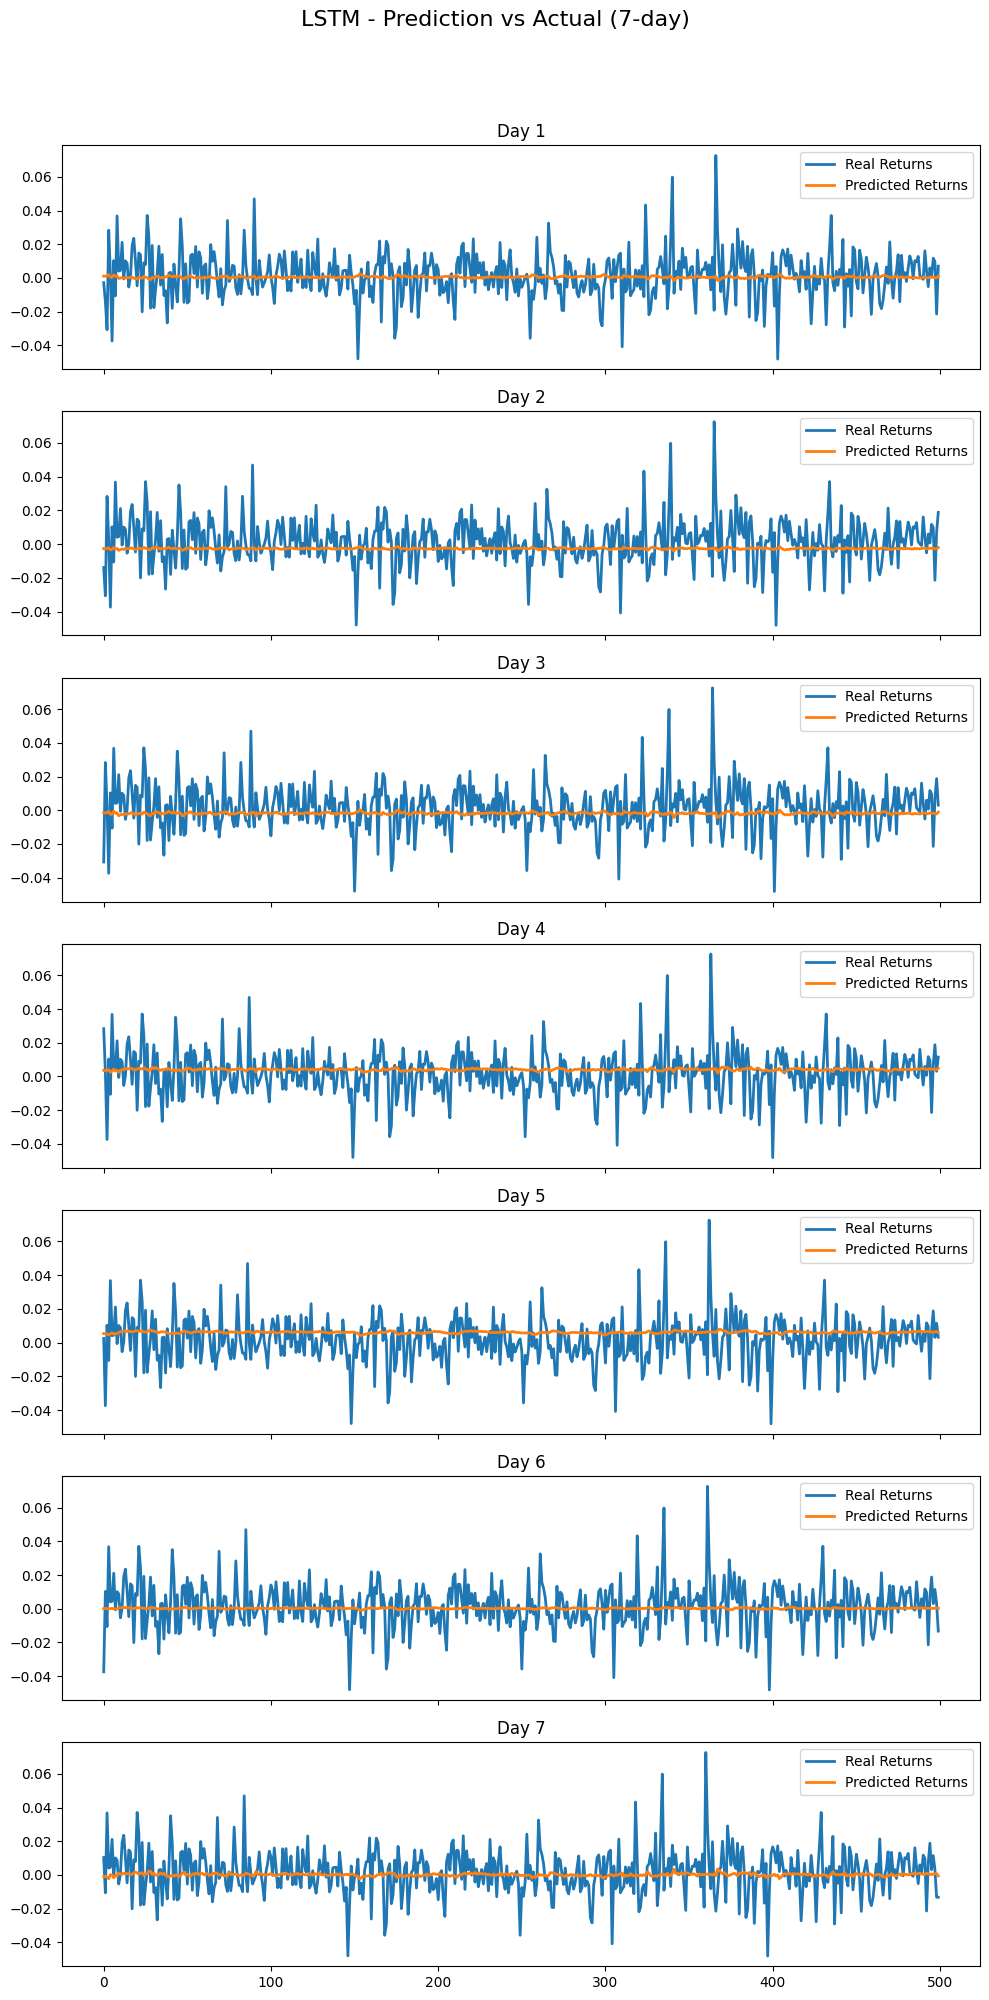

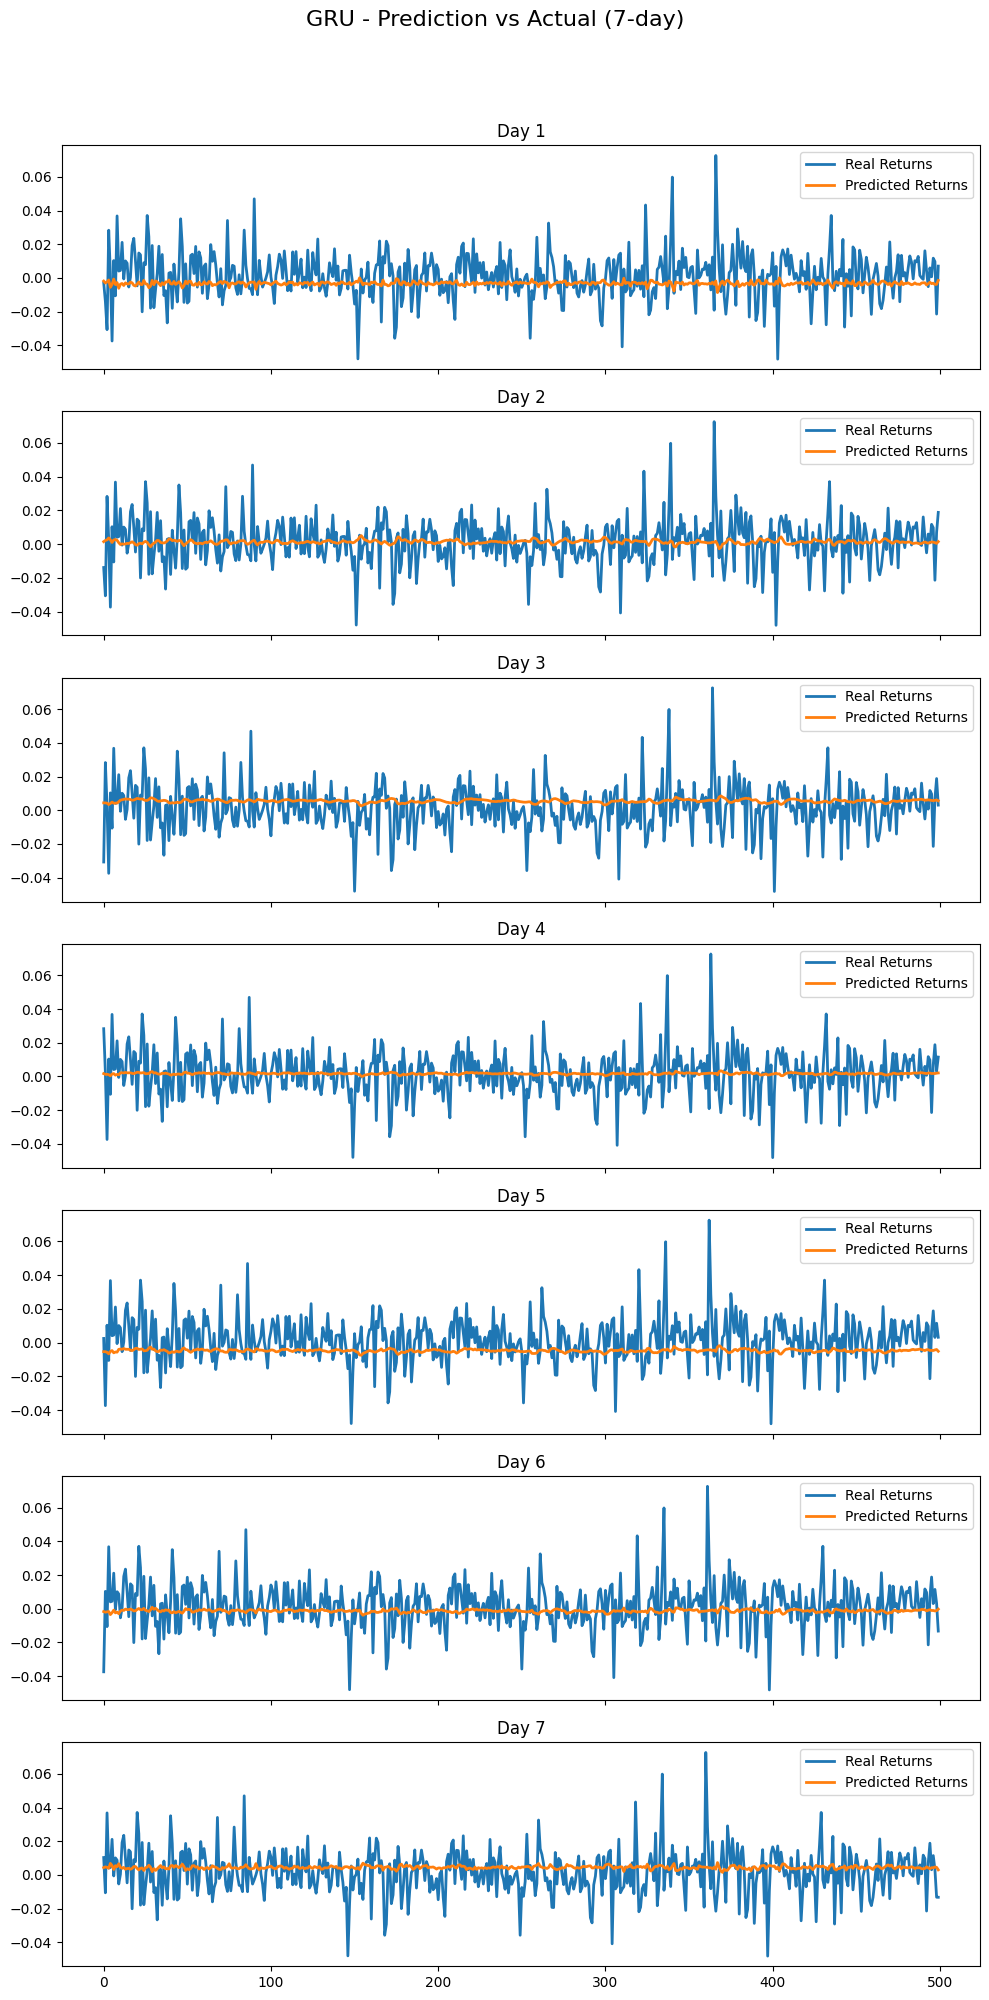

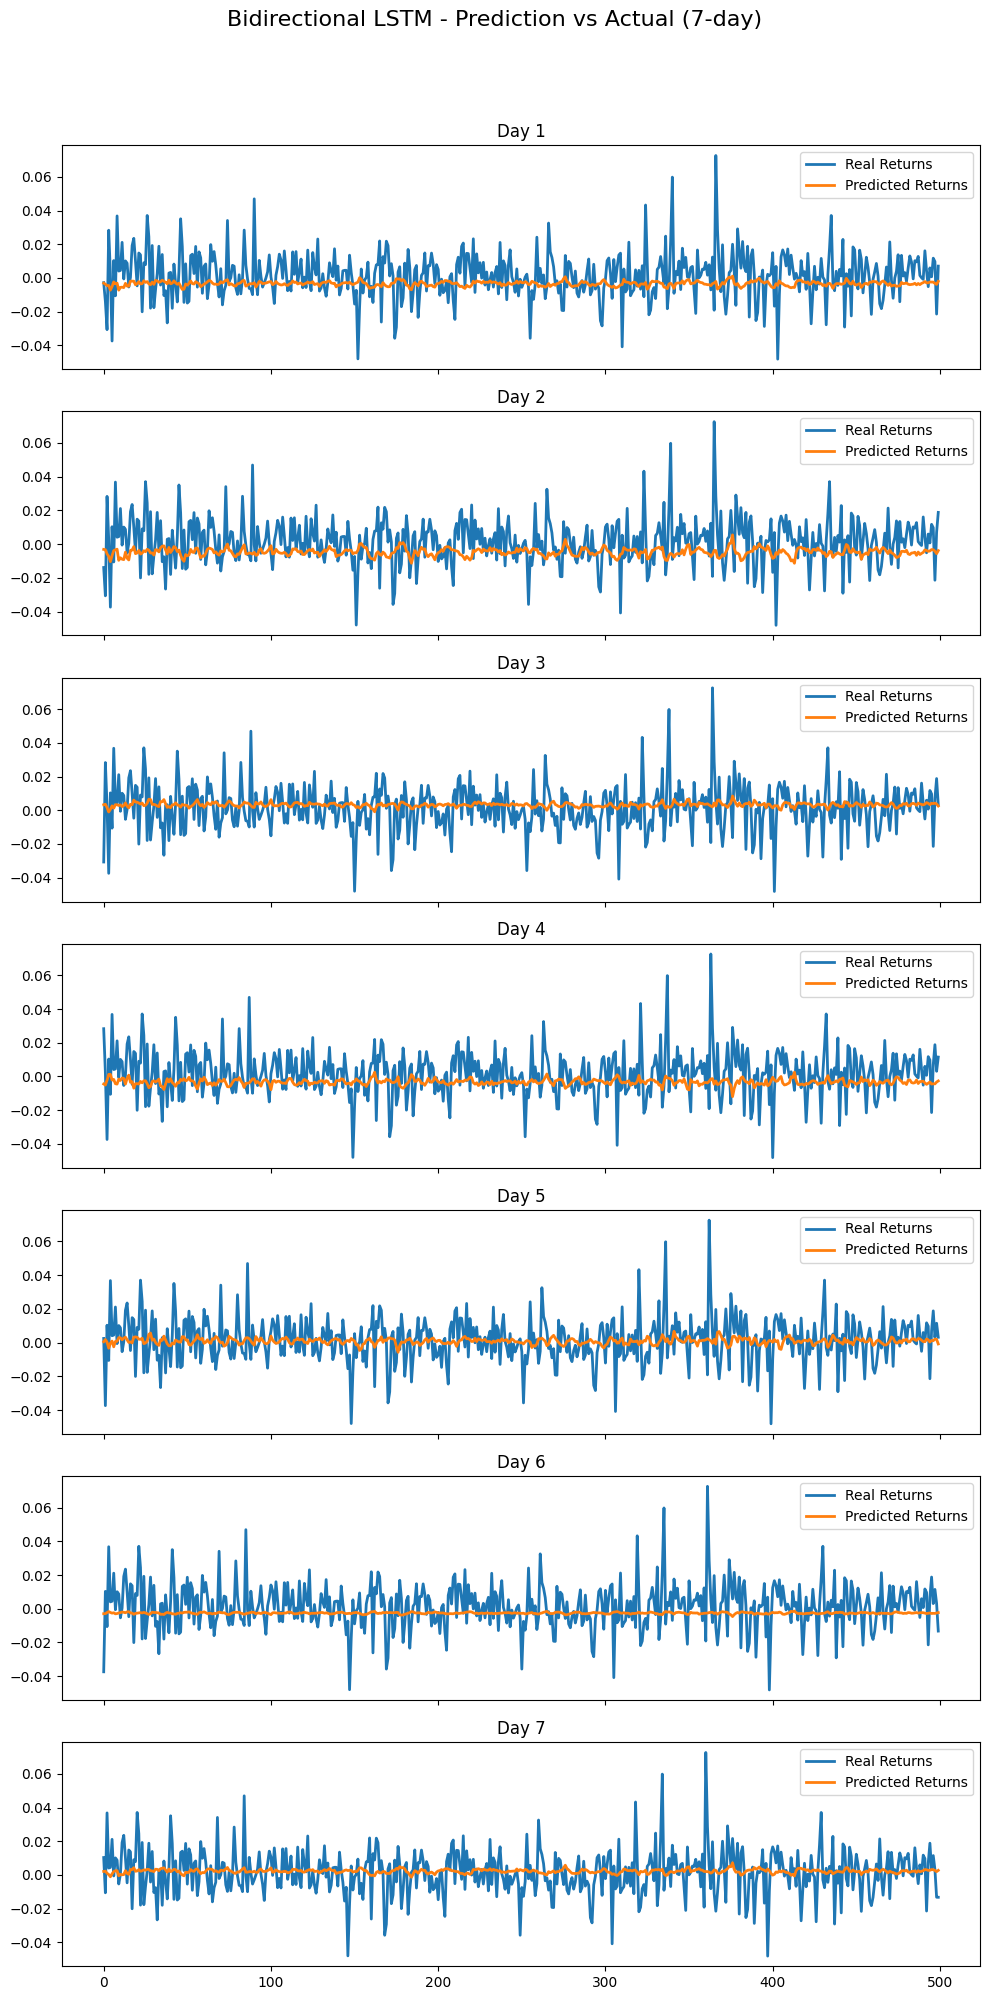

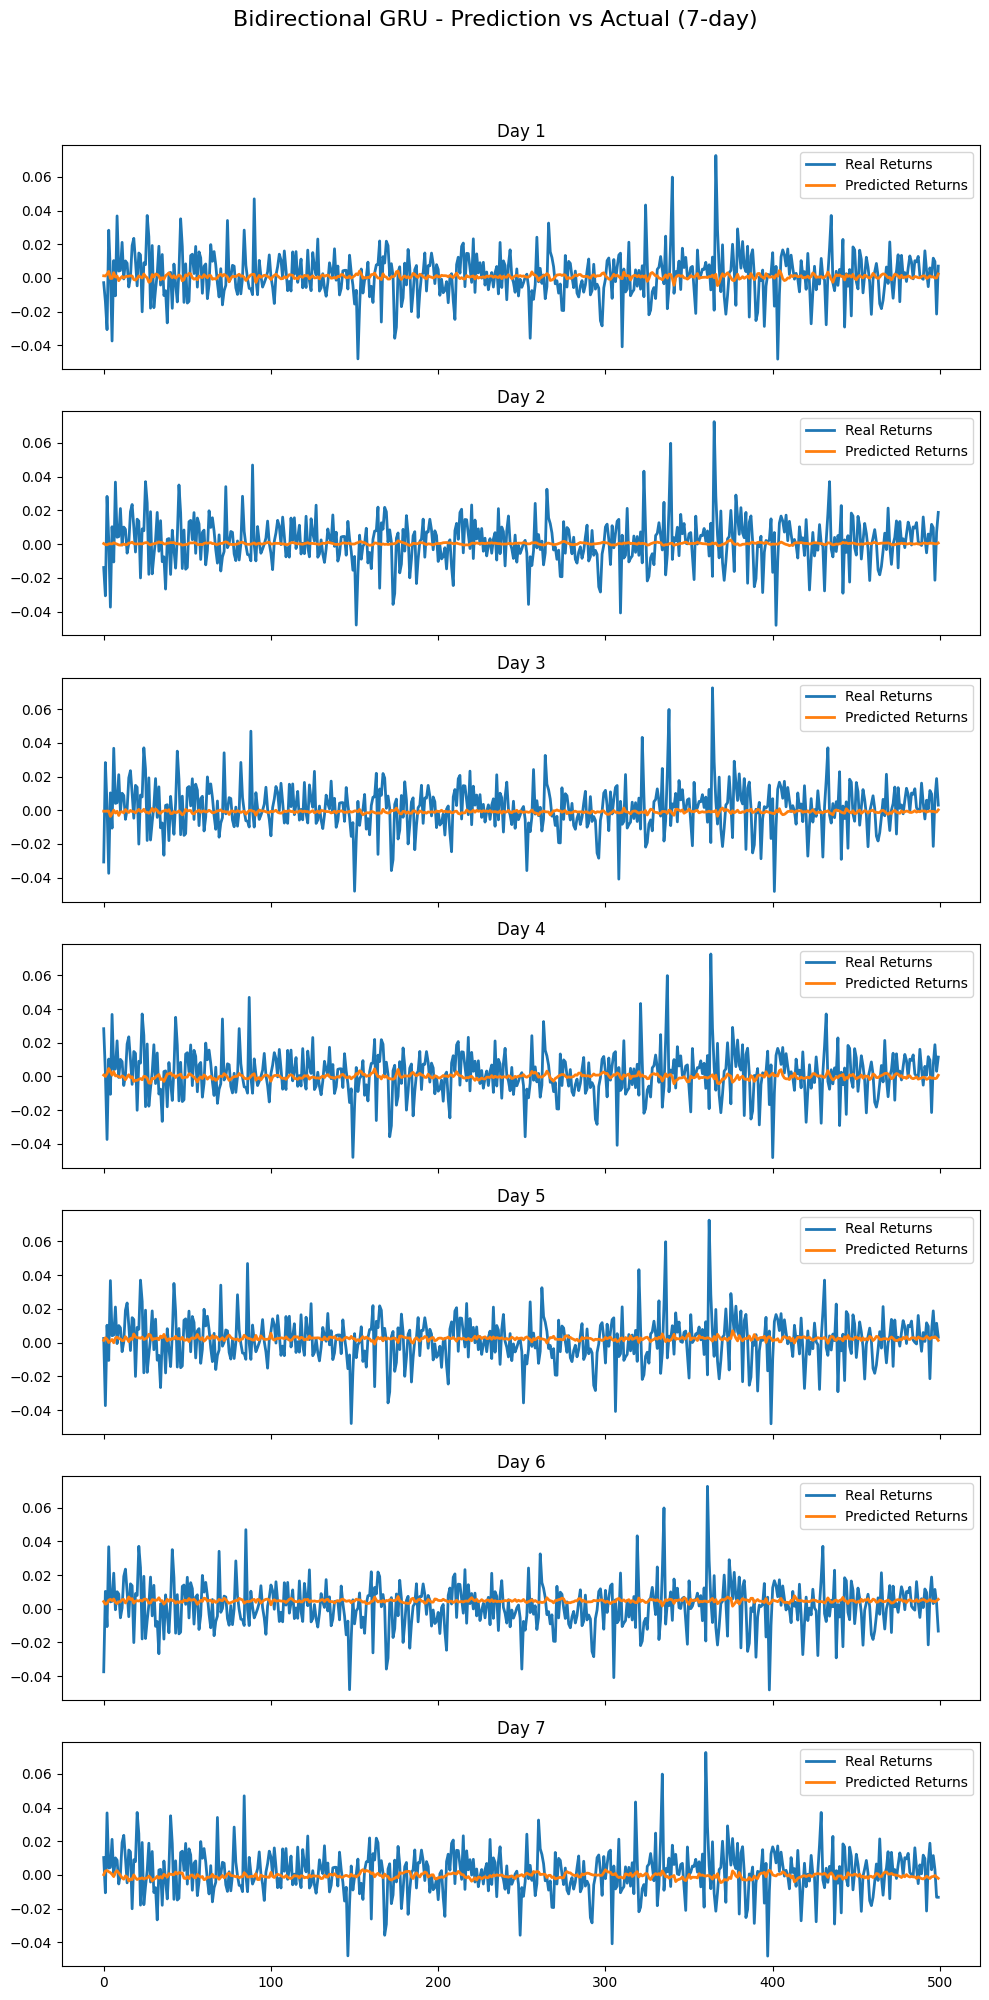

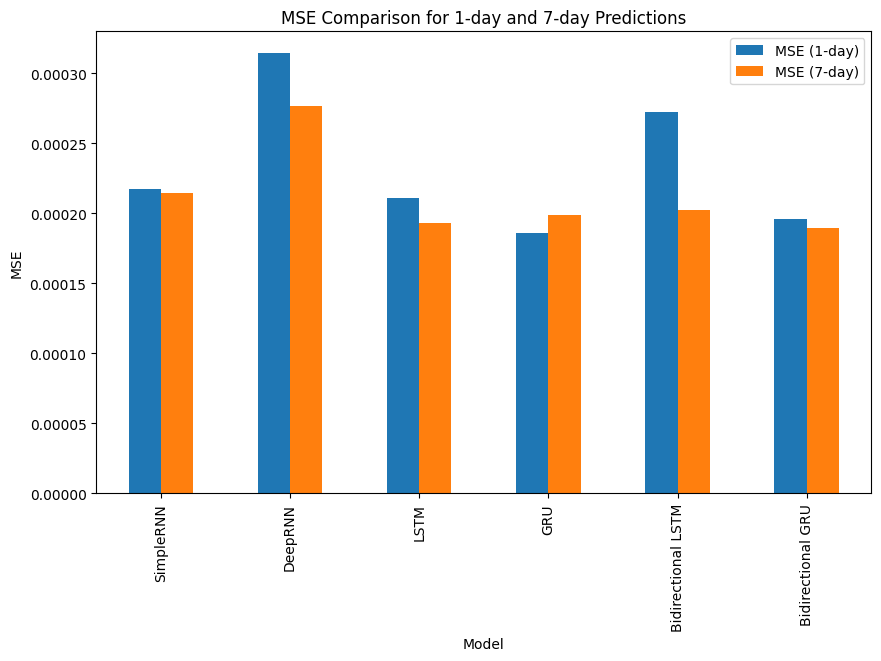

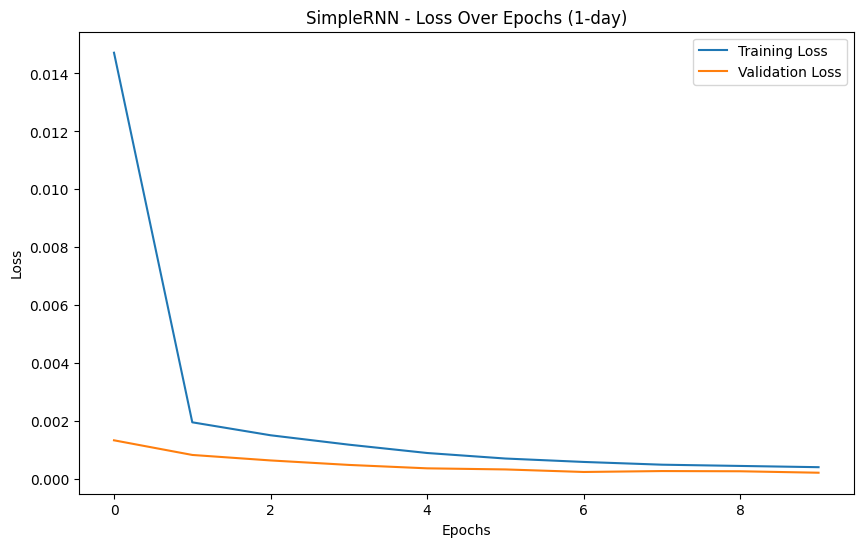

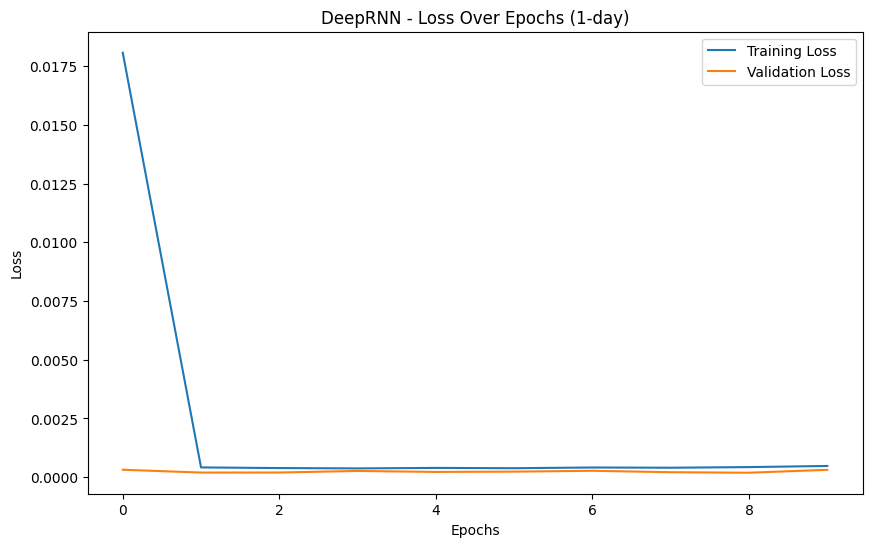

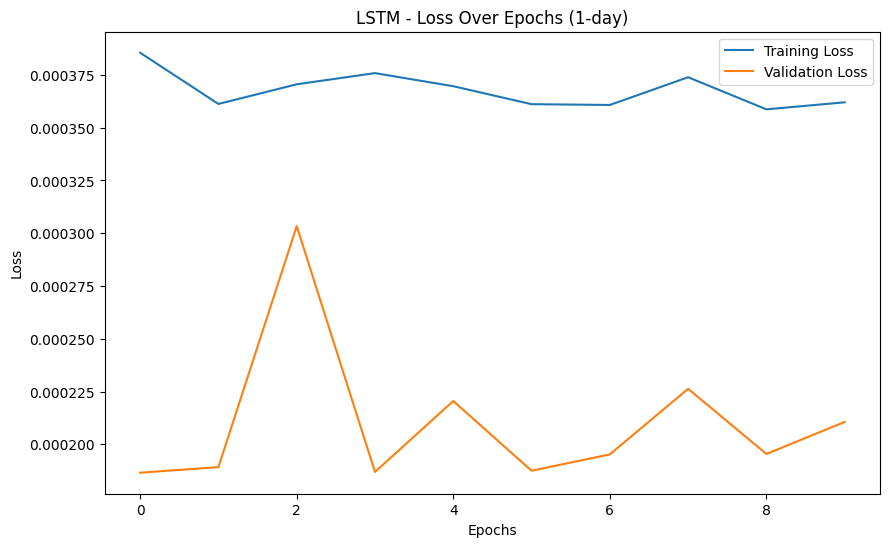

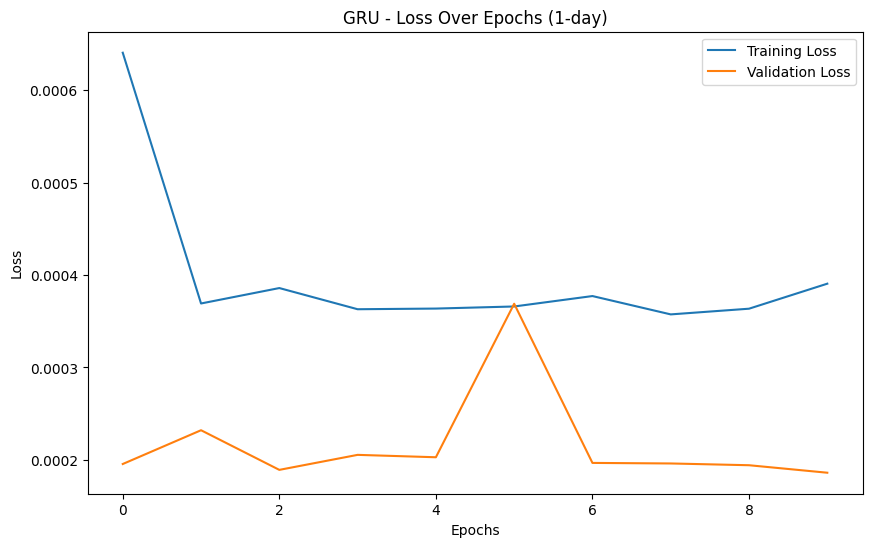

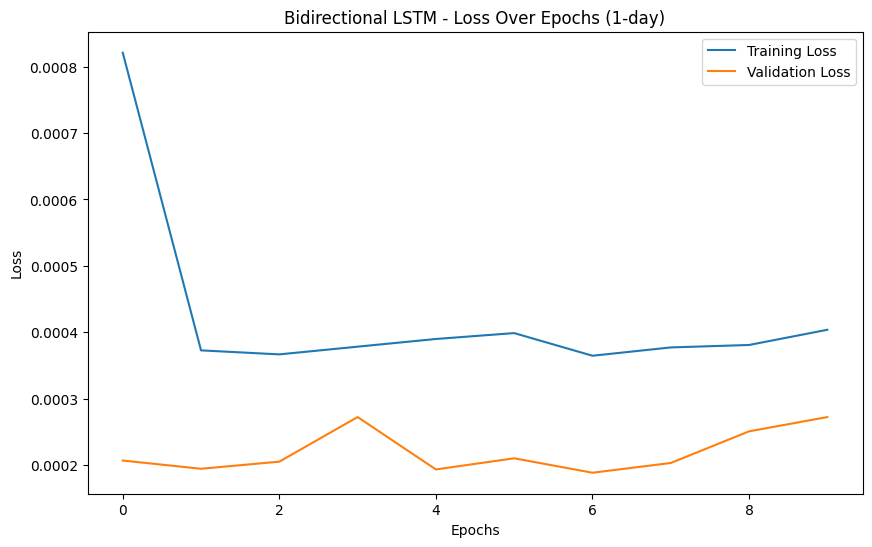

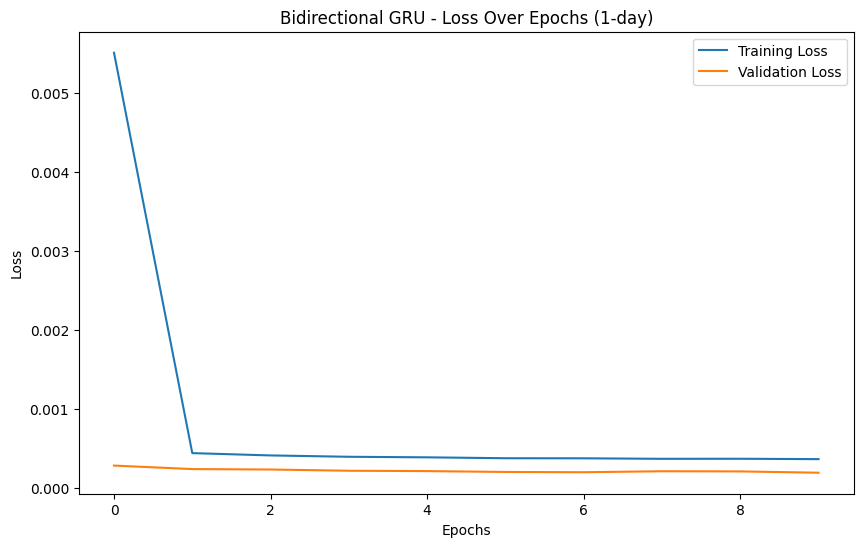

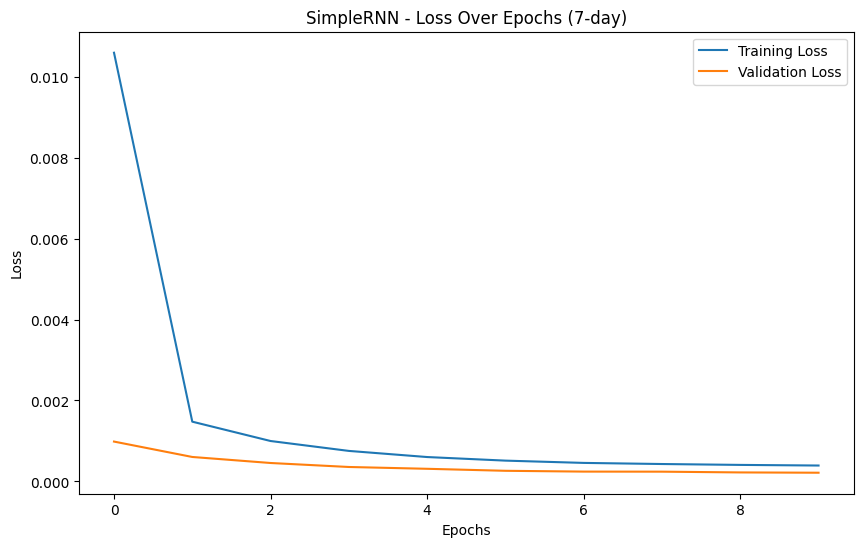

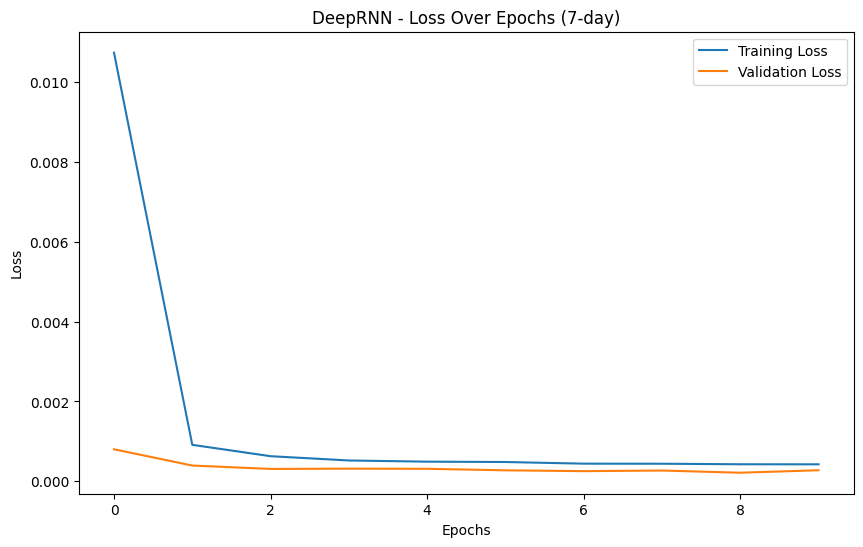

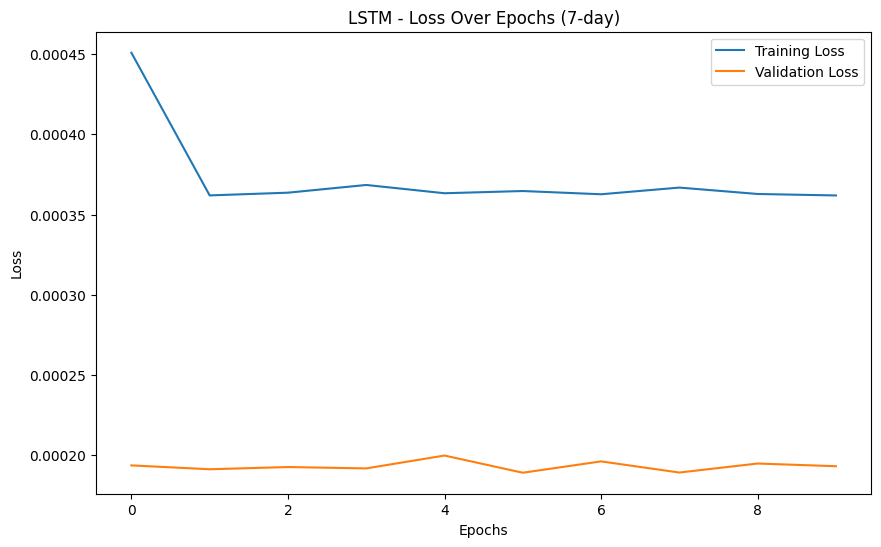

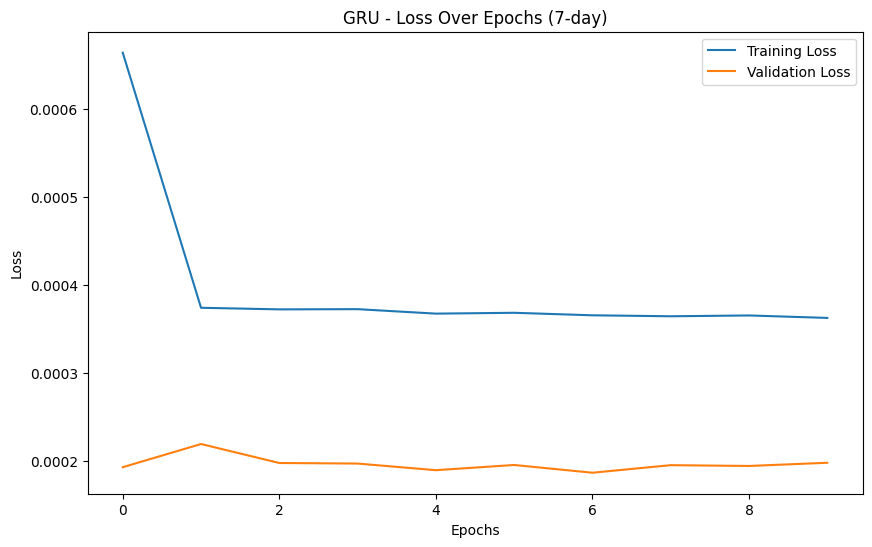

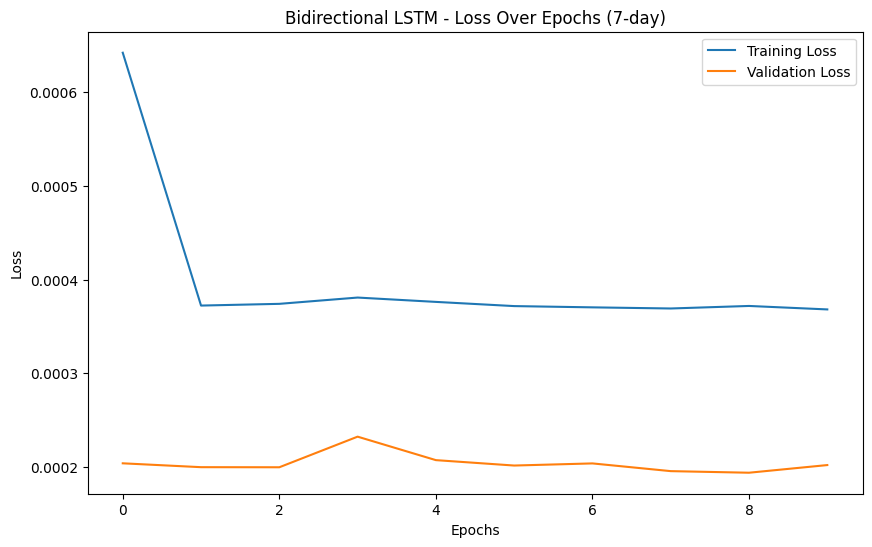

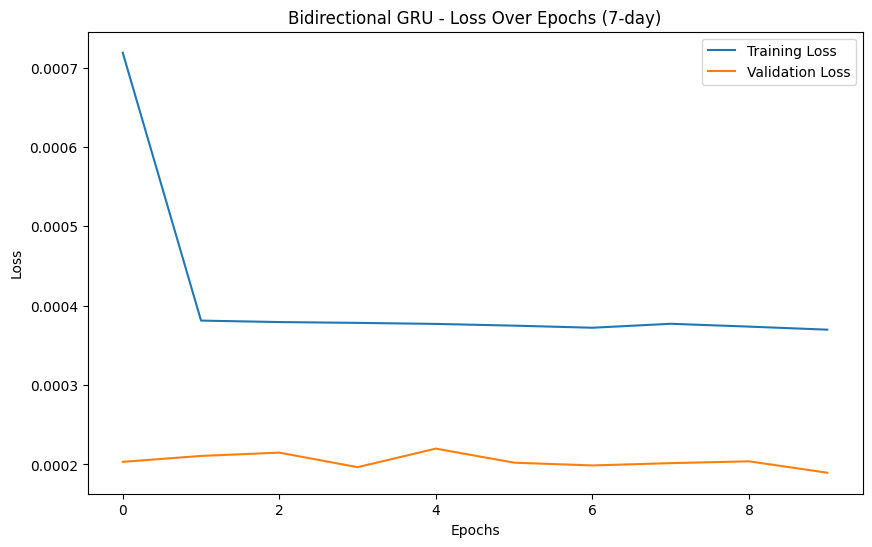

In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Bidirectional, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

aapl = yf.Ticker("AAPL")
df = aapl.history(start="2015-01-01", end="2024-12-31")

df['Return'] = df['Close'].pct_change()

returns = df['Return'].dropna().values

np.save("aapl_daily_returns.npy", returns)

plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Return'], label='Daily Return', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Daily Returns of AAPL (2015–2024)")
plt.xlabel("Ημερομηνία")
plt.ylabel("Return")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

def windowing(series, win_predictor, win_target):
    X, y = [], []
    for i in range(len(series) - win_predictor - win_target + 1):
        X.append(series[i : i + win_predictor])
        y.append(series[i + win_predictor : i + win_predictor + win_target])
    return np.array(X), np.array(y)

lags = 100
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(returns, lags=lags, method='ywm', ax=ax)
plt.title("Partial Autocorrelation Function (PACF)")
plt.xlabel("lag ($k$)")
plt.show()

win_predictor = 10
win_target = 1  # πρόβλεψη για 1 μέρα

X, y = windowing(returns, win_predictor, win_target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def build_model(model_type, input_shape, output_size):
    model = Sequential()
    model.add(Input(shape=input_shape))
    if model_type == 'SimpleRNN':
        model.add(SimpleRNN(50))
    elif model_type == 'DeepRNN':
        model.add(SimpleRNN(50, return_sequences=True))
        model.add(SimpleRNN(50))
    elif model_type == 'LSTM':
        model.add(LSTM(50))
    elif model_type == 'GRU':
        model.add(GRU(50))
    elif model_type == 'Bidirectional LSTM':
        model.add(Bidirectional(LSTM(50)))
    elif model_type == 'Bidirectional GRU':
        model.add(Bidirectional(GRU(50)))
    model.add(Dense(output_size))  
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

models = ['SimpleRNN', 'DeepRNN', 'LSTM', 'GRU', 'Bidirectional LSTM', 'Bidirectional GRU']
predictions_1_day = {}
mse_values_1_day = {}
history_1_day = {}

for model_type in models:
    model = build_model(model_type, (X_train_scaled.shape[1], 1), win_target)
    history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_test_scaled, y_test))
    y_pred = model.predict(X_test_scaled)
    predictions_1_day[model_type] = y_pred
    mse = mean_squared_error(y_test, y_pred)
    mse_values_1_day[model_type] = mse
    history_1_day[model_type] = history

print("MSE Values for each model (1-day prediction):")
for model_type in models:
    print(f"{model_type}: {mse_values_1_day[model_type]}")

win_target_7 = 7  # πρόβλεψη για 7 μέρες
X_7, y_7 = windowing(returns, win_predictor, win_target_7)

X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_7, y_7, test_size=0.2, shuffle=False)

X_train_scaled_7 = scaler.fit_transform(X_train_7)
X_test_scaled_7 = scaler.transform(X_test_7)

predictions_7_day = {}
mse_values_7_day = {}
history_7_day = {}

for model_type in models:
    model = build_model(model_type, (X_train_scaled_7.shape[1], 1), win_target_7)
    history = model.fit(X_train_scaled_7, y_train_7, epochs=10, batch_size=32, verbose=0, validation_data=(X_test_scaled_7, y_test_7))
    y_pred_7 = model.predict(X_test_scaled_7)
    predictions_7_day[model_type] = y_pred_7
    mse_7 = mean_squared_error(y_test_7, y_pred_7)
    mse_values_7_day[model_type] = mse_7
    history_7_day[model_type] = history

print("MSE Values for each model (7-day prediction):")
for model_type in models:
    print(f"{model_type}: {mse_values_7_day[model_type]}")

for model_type in models:
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Real Returns', linewidth=2)
    plt.plot(predictions_1_day[model_type], label=f'Predicted Returns ({model_type})', linewidth=2)
    plt.title(f'{model_type} - Prediction vs Actual (1-day)')
    plt.legend()
    plt.show()

for model_type in models:
    y_true = y_test_7
    y_pred = predictions_7_day[model_type]
    num_samples = y_true.shape[0]
    num_days = y_true.shape[1]
    
    fig, axs = plt.subplots(nrows=num_days, ncols=1, figsize=(10, 3 * num_days), sharex=True)
    fig.suptitle(f'{model_type} - Prediction vs Actual (7-day)', fontsize=16)
    
    for day in range(num_days):
        axs[day].plot(y_true[:, day], label='Real Returns', linewidth=2)
        axs[day].plot(y_pred[:, day], label='Predicted Returns', linewidth=2)
        axs[day].set_title(f'Day {day + 1}')
        axs[day].legend()
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Συγκεντρωτικό διάγραμμα των MSE για 1 και 7 μέρες πρόβλεψη
mse_df_1_day = pd.DataFrame(mse_values_1_day.items(), columns=['Model', 'MSE (1-day)'])
mse_df_7_day = pd.DataFrame(mse_values_7_day.items(), columns=['Model', 'MSE (7-day)'])
mse_df = pd.merge(mse_df_1_day, mse_df_7_day, on='Model')

mse_df.plot(x='Model', kind='bar', figsize=(10, 6))
plt.title('MSE Comparison for 1-day and 7-day Predictions')
plt.ylabel('MSE')
plt.show()

# loss for each model over epochs for 1-day prediction
for model_type in models:
    plt.figure(figsize=(10, 6))
    plt.plot(history_1_day[model_type].history['loss'], label='Training Loss')
    plt.plot(history_1_day[model_type].history['val_loss'], label='Validation Loss')
    plt.title(f'{model_type} - Loss Over Epochs (1-day)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# # loss for each model over epochs for 7-day prediction
for model_type in models:
    plt.figure(figsize=(10, 6))
    plt.plot(history_7_day[model_type].history['loss'], label='Training Loss')
    plt.plot(history_7_day[model_type].history['val_loss'], label='Validation Loss')
    plt.title(f'{model_type} - Loss Over Epochs (7-day)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

**Όπως φαίνεται από τα prediction plots, τα loss plots αλλά και τις τιμές του MSE, τα μοντέλα Simple και Deep RNN παρουσιάζουν σαφώς καλύτερη απόδοση στις προβλέψεις σε σύγκριση με τα υπόλοιπα.**

η συνομιλία μου με το ChatGPT για την κατανόηση του προβλήματος και βοήθεια στην εκπόνηση του:

https://chatgpt.com/share/681e1811-4460-8013-a0c0-812f89ac94f9

__________________________________________________________________________________________________________________________